In [68]:
import pandas as pd
import numpy as np

In [69]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus'] = False
#plt.rcParams['font,family'] = 'Malgun Gothic'
font_name = font_manager.FontProperties(fname = 'c:/windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

In [72]:
df10 = pd.read_csv("C:/Users/gksal/Downloads/2019_가구마스터_20230407_06298.csv",encoding='cp949')
df20 = pd.read_csv('household_2020a.csv')
df10
df20

,Unnamed: 0,year,metro,id,sex,age,number,education,marriage,asset,debt,income,industry,job,house
0,0,2020,G1,10000112,1,34,3,6,2,112000,54500,4599,F,3,2
1,1,2020,G1,10000132,2,45,2,8,2,42500,17500,15257,J,2,3
2,2,2020,G1,10000162,2,73,1,2,3,5712,0,725,T,4,2
3,3,2020,G1,10000182,1,58,2,4,2,14870,0,2431,C,5,2
4,4,2020,G1,10000192,2,27,1,4,1,814,0,893,R,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,18059,2020,G2,993800291,1,42,3,6,2,6705,2200,-390,NaN,NaN,3
18060,18060,2020,G2,994800251,1,49,5,6,2,130180,22000,11784,O,3,1
18061,18061,2020,G2,994800261,1,57,5,6,2,265226,29000,11560,NaN,NaN,1
18062,18062,2020,G2,994800291,2,53,2,7,4,109695,25000,7074,O,2,2


In [73]:
columns = ["조사연도", "수도권여부", "MD제공용_가구고유번호", "가구주_성별코드", "가구주_만연령",
"가구원수", "가구주_교육정도_학력코드", '가구주_혼인상태코드',"자산","부채", "처분가능소득(보완)[경상소득(보완)-비소비지출(보완)]", "가구주_산업대분류코드", "가구주_직업대분류코드", "입주형태코드"]
df111 = df10[columns]
df10.rename(columns={"조사연도":"year", "MD제공용_가구고유번호":"id", "수도권여부":"metro",  
"가구주_성별코드":"sex", "가구주_만연령":"age", "가구원수":'number', "가구주_교육정도_학력코드":"education", '가구주_혼인상태코드':"marriage", "자산":'asset', "부채":"debt",
"처분가능소득(보완)[경상소득(보완)-비소비지출(보완)]":"income", "가구주_산업대분류코드":"industry", "가구주_직업대분류코드":"job", "입주형태코드":"house"}, inplace=True)
df10.tail()

,year,id,가중값,metro,sex,number,노인가구여부,조손가구여부,한부모가구여부,다문화가구여부(2012년~),...,원리금상환_가계지출감소항목코드,부채상환가능시기코드,가구주_은퇴여부,가구주_미은퇴_은퇴연령,가구주_미은퇴_최소생활비,가구주_미은퇴_적정생활비,가구주_미은퇴_노후준비상황코드,가구주_은퇴_은퇴연령,가구주_은퇴_적정생활비충당여부,가구주은퇴_생활비재원마련코드(2014년~)
18401,2019,994800291,565.417703,G2,2,1,G2,G2,G2,G2,...,NaN,NaN,1,65.0,150.0,200.0,3.0,NaN,NaN,NaN
18402,2019,995800211,393.813415,G2,1,4,G2,G2,G2,G2,...,NaN,1.0,1,60.0,300.0,500.0,3.0,NaN,NaN,NaN
18403,2019,995800231,631.065023,G2,1,3,G2,G2,G2,G2,...,2.0,1.0,1,60.0,300.0,500.0,2.0,NaN,NaN,NaN
18404,2019,995800251,391.223998,G2,2,2,G2,G2,G2,G2,...,NaN,NaN,1,70.0,200.0,200.0,3.0,NaN,NaN,NaN
18405,2019,995800261,781.810762,G2,1,5,G2,G2,G2,G2,...,2.0,1.0,1,60.0,200.0,300.0,3.0,NaN,NaN,NaN


In [75]:
df20.columns

Index(['Unnamed: 0', 'year', 'metro', 'id', 'sex', 'age', 'number',
       'education', 'marriage', 'asset', 'debt', 'income', 'industry', 'job',
       'house'],
      dtype='object')

In [76]:
df10.columns

Index(['year', 'id', '가중값', 'metro', 'sex', 'number', '노인가구여부', '조손가구여부',
       '한부모가구여부', '다문화가구여부(2012년~)',
       ...
       '원리금상환_가계지출감소항목코드', '부채상환가능시기코드', '가구주_은퇴여부', '가구주_미은퇴_은퇴연령',
       '가구주_미은퇴_최소생활비', '가구주_미은퇴_적정생활비', '가구주_미은퇴_노후준비상황코드', '가구주_은퇴_은퇴연령',
       '가구주_은퇴_적정생활비충당여부', '가구주은퇴_생활비재원마련코드(2014년~)'],
      dtype='object', length=159)

In [77]:
df11 = df10[['year','id','income']]
df21 = df20[['year','id','age','sex','income']]

In [78]:
df = pd.merge(df11,df21,on='id',how='inner')
df.tail(3)

,year_x,id,income_x,year_y,age,sex,income_y
13907,2019,994800261,30982,2020,57,1,11560
13908,2019,994800291,5293,2020,53,2,7074
13909,2019,995800261,9022,2020,44,1,5404


In [79]:
df1 = df.set_index('id')
df2 = df1[['sex','age','income_x','income_y']]
df2.rename(columns={'income_x':'income2019','income_y':'income2020'},inplace=True)
df2['diff'] = df2['income2020'] - df2['income2019']
df2.tail(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\gksal\AppData\Local\Temp/ipykernel_21520/4018806484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diff'] = df2['income2020'] - df2['income2019']


,sex,age,income2019,income2020,diff
id,,,,,
994800261,1,57,30982,11560,-19422
994800291,2,53,5293,7074,1781
995800261,1,44,9022,5404,-3618


## 가구의 2019년2020년 소득 분포를 확률 히스토그램으로 보입니다

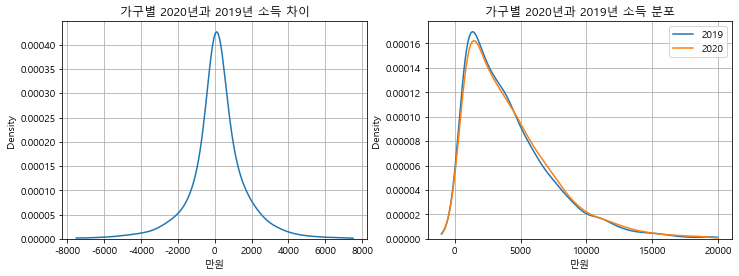

In [81]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['axes.grid'] = True
fig,axs = plt.subplots(1,2)
axs[0].set_title("가구별 2020년과 2019년 소득 차이")
sns.kdeplot(df2['diff'],shade = False, clip = (-7500,7500),ax=axs[0])
axs[0].set_xlabel('만원')

axs[1].set_title("가구별 2020년과 2019년 소득 분포")
sns.kdeplot(df2['income2019'],shade = False,clip=(-1000,20000),label="2019",ax=axs[1])
sns.kdeplot(df2['income2020'],shade = False,clip=(-1000,20000),label="2020",ax=axs[1])
axs[1].set_xlabel('만원')
plt.legend(loc='upper right')
plt.show()

In [82]:
df3 = df2.copy()
mn = df3['diff'].mean()
std = df3['diff'].std()
n = len(df3)
se = std/np.sqrt(n)
z = mn/se
z.round(1)

7.5

In [83]:
import scipy as sp
import scipy.stats
rv = sp.stats.norm(loc=0,scale=1)
np.round(1-rv.cdf(z),2)

0.0

## 30대 1인 가구주 성별에 따른 소득 차이 검정

In [84]:
df = pd.read_csv("household_2020a.csv")
df1 = df.loc[df['number'].isin([1])&(df['age']>30) & (df['age']<40)] # 30대 1인 가구 선택
df2 = df1[['sex','number','age','income']]
df2.tail(3)

,sex,number,age,income
17599,2,1,37,4603
17696,1,1,37,1122
18014,2,1,34,4618


### 30대 1인 가구주의 소득 분포를 남자와 여자로 구분하여 보입니다

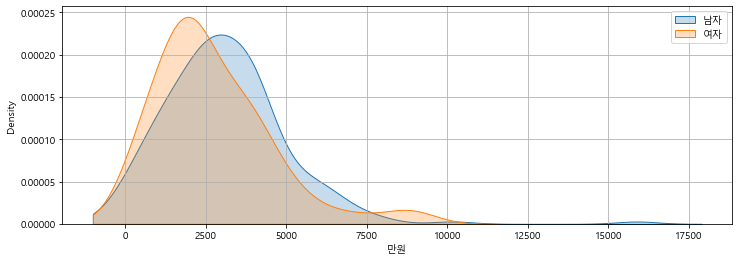

In [86]:
import seaborn as sns
df21 = df2.loc[df2['sex'].isin([1])] # 남자
df22 = df2.loc[df2['sex'].isin([2])]
sns.kdeplot(df21['income'],shade=True,label='남자',clip=(-1000,20000))
sns.kdeplot(df22['income'],shade=True,label='여자',clip=(-1000,20000))
plt.xlabel('만원')
plt.legend()
plt.grid(True)
plt.show()

## Z 통계량 구하기

In [87]:
df3 = df2[['income']].groupby(df2['sex']).agg(['mean','std','count'])
df3

income                   
            mean          std count
sex                                
1    3098.597156  1947.776724   211
2    2743.759398  1865.068730   133

In [88]:
mean = df3[('income','mean')]
mean_df = mean[1]-mean[2]
np.round(mean_df,2)

354.84

In [92]:
std = df3[('income','std')]
count = df3[('income','count')]
se1 = std[1] / np.sqrt(count[1])
se2 = std[1] / np.sqrt(count[1])
tot_se = np.sqrt(se1**2 + se2**2)
np.round(tot_se,2)

189.63

In [93]:
z = mean_df/tot_se
round(z,2)

1.87

In [94]:
import scipy as sp
import scipy.stats
rv = sp.stats.norm(loc=0,scale=1)
np.round(1-rv.cdf(z),2)

0.03

## 성별,직업군별 소득 차이 검정

In [96]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import chi2
import scipy.stats as stats
import random

## x**2 분포 이해하기

In [99]:
DoF = 5
p_value = 1- stats.chi2.cdf(4.8,DoF)
np.round(p_value,2)

0.44

## 모의실험으로 x**2 분포 구하기

In [103]:
def rolldie():
    one = 0; two=0;three=0;four=0;five=0;six=0
    
    for i in range(60):
        roll = random.choice([1,2,3,4,5,6])
        if roll == 1:
            one = one + 1
        elif roll == 2:
            two += 1
        elif roll == 3:
            three += 1
        elif roll == 4:
            four += 1
        elif roll == 5:
            five += 1
        elif roll == 6:
            six += 1
    return [one,two,three,four,five,six]

In [106]:
rolldie()

[6, 12, 12, 10, 8, 12]

In [107]:
def simulate(n):
    chi2 = []
    for i in range(n):
        die = rolldie()
        distance = (((die[0]-10)**2) + ((die[1]-10)**2) + ((die[2]-10)**2) + ((die[3]-10)**2) + ((die[4]-10)**2) + ((die[5]-10)**2))/10
        
        chi2.append(distance)
    return(chi2)
simulate(10)

[0.4, 10.0, 10.2, 8.8, 4.0, 4.4, 2.4, 9.0, 6.6, 6.6]

<function matplotlib.pyplot.show(close=None, block=None)>

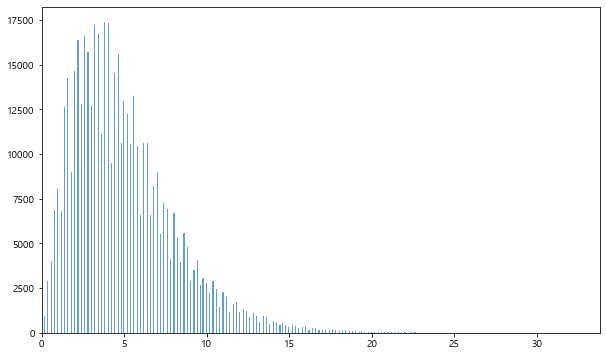

In [110]:
fig,ax = plt.subplots(figsize = (10,6))
x = simulate(500000)
ax.hist(x,alpha=0.7,bins=500)
ax.set_xlim(0,max(x))
ax.grid()
plt.show

In [111]:
np.percentile(x,95)


11.0

In [113]:
DoF = 5
np.round(stats.chi2.cdf(11.0,DoF),2)

0.95

## 성별,직업군별 소득 차이 검정

In [114]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.1f}'.format

In [115]:
df = pd.read_csv("household_2020a.csv")
df1 = df[["sex","job"]]
df1 = df1.dropna()

In [116]:
df2 = df1.drop(df1[(df1.job=="A")].index)  # 군인 직업군 제외

cross_tab1 = pd.crosstab(df2.sex,df2.job,margins = True)  # 성별 관측도수
cross_tab1

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,316,1623,1644,558,882,1020,1379,1832,1318,10572
2,12,420,315,601,323,197,76,87,586,2617
All,328,2043,1959,1159,1205,1217,1455,1919,1904,13189


In [117]:
tot = cross_tab1.iloc[-1,1] # total

j1 = cross_tab1.iloc[-1,0]
j2 = cross_tab1.iloc[-1,1]
j3 = cross_tab1.iloc[-1,2]
j4 = cross_tab1.iloc[-1,3]
j5 = cross_tab1.iloc[-1,4]
j6 = cross_tab1.iloc[-1,5]
j7 = cross_tab1.iloc[-1,6]
j8 = cross_tab1.iloc[-1,7]
j9 = cross_tab1.iloc[-1,8]

s1 = cross_tab1.iloc[0,-1]
s2 = cross_tab1.iloc[1,-1]